<a href="https://colab.research.google.com/github/songhakim/Material-modelling/blob/main/Simple_materials_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 1**

Simple model to describe the interaction of atoms, called the "Morse potential", 
which assumes that atoms interact with each other pairwise, and the total potential energy of a collection of atoms is

$$
E_{total} = \sum_{i \textrm{\textgreater} j} V_{M}(r_{ij})
$$

where the double sum runs over the indices of every pair of atoms (counting every pair only once), $r_{ij}$ is the distance between atoms $i$ and $j$, and the _interaction potential_ is given by

$$
V_{M}(r) = D \left[e^{-2\alpha (r-r_0))} - 2e^{-\alpha (r-r_0))} \right]
$$

There are three adjustable parameters in this model. You can think of $D$ as fixing the energy scale of the model, $r_0$ as fixing the distance between neighbouring atoms, and $\alpha$ as fixing the length scale over which the interaction between atoms decays (in inverse length units). 

In the small scale world of atoms, it is convenient to measure energies in _electron Volts_ (eV), with 1 eV $\approx 1.6 \times 10^{-19}~$J, and distances in _Ångstroms_ (Å), with 1 Å = $10^{-10}~$m, and these are the intrinsic units of ASE. All other derived units follow from this, e.g. forces are in eV/Å, stresses are in eV/Å$^3$. ASE provides the constant ```GPa``` that can be used to convert pressures and stresses from eV/Å$^3$ into GPa units. 

In [6]:
!pip install ase
!pip install matscipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matscipy: filename=matscipy-0.7.0-cp38-cp38-linux_x86_64.whl size=487977 sha256=eb3e2f0195adc7455cc9eb2488525a1d4faa73de17818a7d5dde8f48c1c3e5b4
  Stored in directory: /root/.cache/pip/wheels/53/18/36/624abd202697126510f3d3c9ff3ce9d22cd73fcae4be92cc0a
Successfully built matscipy


In [10]:
from __future__ import print_function
import numpy as np
from ase import Atoms
from ase.units import eV, Ang, GPa
d = 2.5*Ang
a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., d)])

In [12]:
import sys
sys.path.append(r'files')
import Morse
calc = Morse.MorsePotential()

a.set_calculator(calc) 
a.get_potential_energy()

-0.14929402163819286

### Deliverable 1

Function that computes the Morse potential energy for two atoms for a given distance between them, and use it to:
1. __Created a plot of the energy against distance. Now do the same for the the force exerted by one atom on the other.__

2. __Distance between the two atoms corresponding to the lowest potential energy ?__


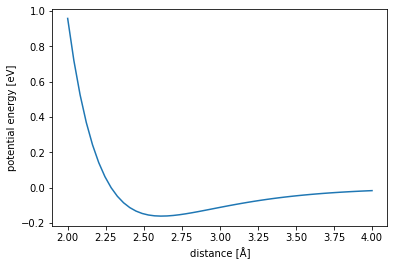

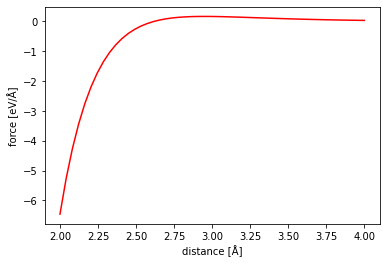

lowest potential energy is at the distance greater than 2.0Å.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
N = 50
start = 2.0*Ang
end = 4*Ang
t = np.linspace(start,end,N)

energy = np.zeros(N)
force = np.zeros(N)

for i in range (0,N):
    a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., t[i])])
    a.set_calculator(calc) 
    energy[i] = a.get_potential_energy()
    force[i] = a.get_forces()[0][2]

plt.figure(1)
plt.plot(t, energy)
plt.xlabel("distance [Å]")
plt.ylabel("potential energy [eV]")
plt.show()

plt.figure(2)
plt.plot(t, force, color="red")
plt.xlabel("distance [Å]")
plt.ylabel("force [eV/Å]")
plt.show()

print("lowest potential energy is at the distance greater than 2.0Å.")

### Task and Deliverable 2 

1. __Unit test_ that verifies that the forces returned by the ```get_forces()``` function is really the negative gradient of the energy (as returned by the ```get_potential_energy()``` function) with respect to the atomic positions. Do this by comparing the forces returned by ```get_forces()``` to those obtained by numerical finite differences of energies between two sets of atomic positions, displaced by small amount.__

2. __Experiment with different values of $\epsilon$ and look at how accurate the approximation is as a function of $\epsilon$.__


Use the idea of the definition of the gradient and its relation to the Taylor expansion:

$$
\nabla f(x) \approx \frac{f(x+\epsilon)-f(x)}{\epsilon}
$$

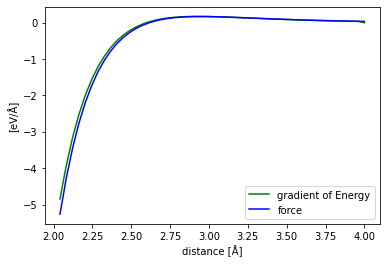

In [14]:
gradient_energy = np.zeros(N)
e = (end - start)/N


for i in range(1, N):
    gradient_energy[i-1] = (energy[i] - energy[i-1])/e

plt.figure(3)
plt.plot(t[1:N], gradient_energy[1:N], color="green", label = "gradient of Energy")
plt.plot(t[1:N], force[1:N], color="blue", label = "force")
plt.xlabel("distance [Å]")
plt.ylabel("[eV/Å]")
plt.legend()
plt.show()

### Task 3

_Created a cubic unit cell of the Cu crystal, and extract some of its properties._

In order to investigate the properties of bulk copper, we need to model a large number of atoms. But evaluating the total potential energy of a large number of atoms takes a long time, and so we need a shortcut. In fact many simple properties of a crystalline solid can be evaluated by just considering its _unit cell_, i.e. the smallest repeating unit from which the crystal is made. This is typically true for static properties that do not depend on atoms experiencing a variety of neighbour environments, i.e. in the absence of _defects_. Such properties include the _lattice constant_ (i.e. the density), the _equation of state_, the _elastic constants_ (including the _bulk modulus_), the _Poisson ratio_, etc. 

The trick is to _assume_ that the atoms are arranged in perfect crystalline order, and only explicitly consider those atoms that are in a single unit cell. In order to correctly evaluate the energy, the _effect_ of atoms in neighbouring unit cells needs to be included, but this can be done by using [_periodic boundary conditions_](https://en.wikipedia.org/wiki/Periodic_boundary_conditions). 

In the image below, the blue shaded area is the unit cell, its sides are the lattice vectors that generate the periodic images. 

![Periodic cells](./content/unitcell2.png)

### Deliverable 3

1. __A program that calculates and plots the potential energy and pressure (P) of the copper crystal as a function of volume by applying varying amounts of hydrostatic strain.__
2. __Calculated the [bulk modulus](https://en.wikipedia.org/wiki/Bulk_modulus) at the equilibrium volume. Compare it to the experimental value.__

- The experimental value for Bulk modulus is around 130 - 145 GPa. 

In [16]:
from ase.build import bulk
cu = bulk("Cu", "fcc", a=3.6, cubic=True)

/usr/local/lib/python3.8/dist-packages/ase/atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',
/usr/local/lib/python3.8/dist-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


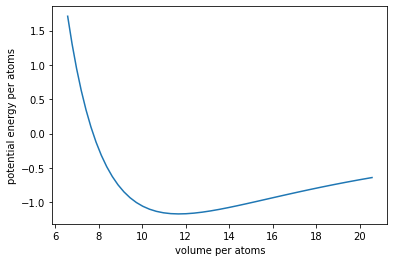

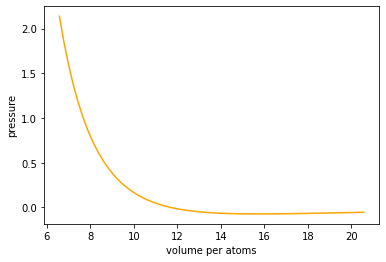

In [17]:
# potential energy / atom, volumes / atom
cu = bulk("Cu", "fcc", a=3.6, cubic=True)
cu.set_calculator(calc)
cuii = cu.copy()
cuii.set_calculator(calc)

N = 40
volume = np.zeros(N)
potential = np.zeros(N)
pressure = np.zeros(N)

#compression
for i in range(0,int(N/2)):
    cell = cu.get_cell()
    potential[int(N/2)-1-i] = cu.get_potential_energy()/cu.get_number_of_atoms()
    volume[int(N/2)-1-i] = cell[0][0] * cell[1][1] * cell[2][2] / cu.get_number_of_atoms()
    pressure[int(N/2)-1-i] = -1/3 * np.trace(cu.get_stress(voigt=False))
    cell *= 0.99
    cu.set_cell(cell, scale_atoms=True)
    
#tension
for i in range(int(N/2),N):
    cell = cuii.get_cell()
    potential[i] = cuii.get_potential_energy()/cuii.get_number_of_atoms()
    volume[i] = cell[0][0] * cell[1][1] * cell[2][2] / cuii.get_number_of_atoms()
    pressure[i] = -1/3 * np.trace(cuii.get_stress(voigt=False))
    cell *= 1.01
    cuii.set_cell(cell, scale_atoms=True)
plt.figure(4)
plt.plot(volume, potential)
plt.xlabel("volume per atoms")
plt.ylabel("potential energy per atoms")
plt.show()

plt.figure(5)
plt.plot(volume, pressure, color = "orange")
plt.xlabel("volume per atoms")
plt.ylabel("pressure")
plt.show()


Bulk modulus:  103.3230807554667 GPa
calculated bulk modulus is 20% lower than the experiment data.


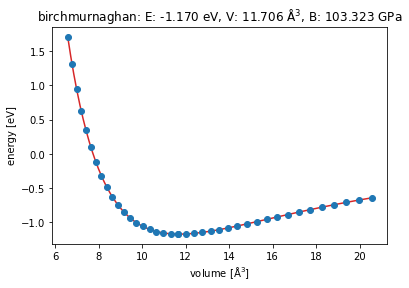

In [18]:
# Compared result above to those computed by ASE. 

# The call below takes two arrays: the variable V is an array of volumes/atom and E
# is an array of corresponding potential energy values, again per atom. If you want to execute this

from ase.eos import EquationOfState
from ase.units import kJ
eos = EquationOfState(volume, potential, eos="birchmurnaghan") # Birch-Murnaghan is a particular functional form fitted to the equation of state
v0, e0, B = eos.fit()
print('Bulk modulus: ', B / kJ * 1.0e24, 'GPa')
eos.plot()
print("calculated bulk modulus is 20% lower than the experiment data.")

### Task and Deliverable 4 

1. __Write a program to compute the [shear modulus](https://en.wikipedia.org/wiki/Shear_modulus).__

a shear in the XY plane by modifying the X component of the lattice vector that points originally in the Y direction, i.e. $L_{2x}$. Apply _small_ amounts of shear, i.e. a few percent. Starting with a cubic cell with side lengths L, new cell matrix, after applying 1% shear in the XY plane, would be given by

$$
\left[\begin{matrix}
L & 0.01L & 0\\0&L&0\\ 0&0&L
\end{matrix}\right]
$$


2. __A program to determine the [Poisson ratio](https://en.wikipedia.org/wiki/Poisson%27s_ratio)__

- The experimental value for Poisson ratio is around 0.34 - 0.36 and around 44 - 49 GPa for the Shear modulus. 
- Note that ASE results the mathematical shear strain ($\varepsilon$), not the engineering shear strain ($\gamma$).


In [19]:
# shear modulus
import math
cu = bulk("Cu", "fcc", a=3.6, cubic=True)
cu.set_calculator(calc)

def get_shear_modulus(atom, strain):
    #assuming shear stress only acts on XY plane in x direction
    length = atom.cell[0][0]
    atom.cell[0][1] = length * strain
    #print(atom.cell)
    tau = cu.get_stress(voigt=False)
    print(tau)
    tau_XY = tau[0][1] 
    G = 160*(tau_XY/(strain*2)) # unit conversion
    return G
G= get_shear_modulus(cu, 0.01)
print("G =", G, "Gpa")



[[-1.97424376e-03  5.39946226e-03 -2.37959325e-18]
 [ 5.39946226e-03 -1.79562278e-03 -1.48724578e-18]
 [-2.37959325e-18 -1.48724578e-18 -1.49739726e-03]]
G = 43.195698107866505 Gpa


/usr/local/lib/python3.8/dist-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


In [20]:
cu = bulk("Cu", "fcc", a=3.603, cubic=True)
cu.set_calculator(calc)

# poisson ratio
def get_poisson_ratio (atom, strain, N = 50):
    length = atom.cell[0][0]
    atom.cell[0][0] += length* strain
    v = 0.01

    for i in range (0, N):
        atom.cell[1][1] -= length* strain* v 
        stress = atom.get_stress(voigt=False)
        stress_y = stress[1][1]
        if (-0.001 <= stress_y <= 0.001 ):
            return v
            break
        v += 0.01
        atom.cell[1][1] = length

print(get_poisson_ratio(cu, 0.05))

0.4100000000000002
